In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sklearn
import joblib
import io

In [2]:
tqdm.pandas()


In [4]:
df1 = pd.read_excel('E:/projects/plds_teamc/data/ar-2010-2014-xlsb.xlsb',engine='pyxlsb')
df2 = pd.read_excel('E:/projects/plds_teamc/data/ar-2015-2016-xlsb.xlsb',engine='pyxlsb')

In [5]:
frames = [df1, df2]
df_combined = pd.concat(frames)

In [6]:
selected_features_1 =["Live Birth Occurrence","Patient Age at Treatment","Total Number of Previous cycles, Both IVF and DI", "Total number of IVF pregnancies","Total number of live births - conceived through IVF","Type of Infertility - Female Primary",
"Type of Infertility - Female Secondary", "Type of Infertility - Male Primary","Type of Infertility - Male Secondary","Type of Infertility -Couple Primary","Type of Infertility -Couple Secondary",
"Cause  of Infertility - Tubal disease", "Cause of Infertility - Ovulatory Disorder","Cause of Infertility - Male Factor","Cause of Infertility - Patient Unexplained","Cause of Infertility - Endometriosis",
"Cause of Infertility - Cervical factors","Cause of Infertility - Female Factors","Cause of Infertility - Partner Sperm Concentration","Cause of Infertility -  Partner Sperm Morphology","Causes of Infertility - Partner Sperm Motility","Cause of Infertility -  Partner Sperm Immunological factors",
"Stimulation used","Egg Source","Sperm From","Fresh Cycle","Frozen Cycle","Eggs Mixed With Partner Sperm","Eggs Thawed","Embryos Transfered","Fresh Eggs Collected"]

In [7]:
dataset_1 = df_combined[selected_features_1]
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495628 entries, 0 to 158518
Data columns (total 31 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Live Birth Occurrence                                        119210 non-null  float64
 1   Patient Age at Treatment                                     495628 non-null  object 
 2   Total Number of Previous cycles, Both IVF and DI             495628 non-null  object 
 3   Total number of IVF pregnancies                              495628 non-null  object 
 4   Total number of live births - conceived through IVF          495628 non-null  int64  
 5   Type of Infertility - Female Primary                         495628 non-null  int64  
 6   Type of Infertility - Female Secondary                       495628 non-null  int64  
 7   Type of Infertility - Male Primary                           4956

In [8]:
dataset_1 = dataset_1.dropna(subset = ["Egg Source","Sperm From"])
dataset_1["Live Birth Occurrence"]=dataset_1["Live Birth Occurrence"].fillna(0)
dataset_1 = dataset_1[dataset_1['Stimulation used'] != 0]
#Convert patient age to categorical data
dataset_1 = dataset_1[dataset_1['Patient Age at Treatment'] != "999"]
dataset_1["Patient Age at Treatment"] = dataset_1["Patient Age at Treatment"].str.replace(" ","")
dataset_1["Patient Age at Treatment"] = dataset_1.replace({"Patient Age at Treatment":{"18-34":"0", "35-37":"1" ,"38-39": "2","40-42": "3", "43-44": "4","44-50": "5"}})
dataset_1 = dataset_1.replace("> 50","50")
dataset_1 = dataset_1.replace(">=5","5")


dataset_1 = dataset_1.replace("Patient","1")
dataset_1 = dataset_1.replace("Partner","1")
dataset_1 = dataset_1.replace("Donor","0")
dataset_1 = dataset_1.replace("Partner & Donor","0")
dataset_1 = dataset_1[dataset_1["Sperm From"].str.contains("not assigned")==False]

ValueError: Columns must be same length as key

In [74]:
dataset_1_X = dataset_1.loc[:, dataset_1.columns != "Live Birth Occurrence"]
dataset_1_Y = dataset_1["Live Birth Occurrence"]
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(dataset_1_X, dataset_1_Y, test_size=0.3, random_state=42)

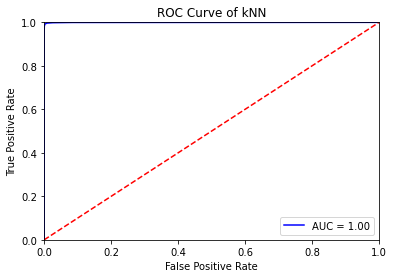

In [75]:
#from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_1,Y_train_1)

y_scores = knn.predict_proba(X_test_1)
fpr, tpr, threshold = roc_curve(Y_test_1, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [77]:
from sklearn.metrics import (roc_auc_score, roc_curve)

trn_preds = knn.predict_proba(X_train_1)
val_preds = knn.predict_proba(X_test_1)
trn_scores= roc_auc_score(Y_train_1, trn_preds)
cv_scores = roc_auc_score(Y_test_1, val_preds)

ValueError: y should be a 1d array, got an array of shape (233472, 2) instead.

Text(0.5, 1.0, 'ROC Curve of kNN')

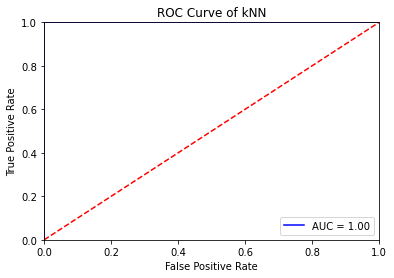

In [23]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_1,Y_train_1)

y_scores = dt.predict_proba(X_test_1)
fpr, tpr, threshold = roc_curve(Y_test_1, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')

Text(0.5, 1.0, 'ROC Curve of kNN')

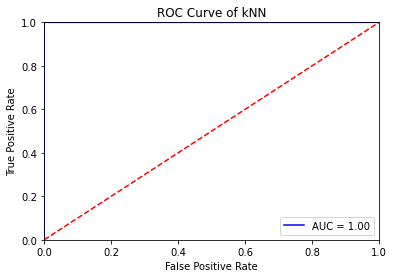

In [25]:
from sklearn.neural_network import MLPClassifier

#from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_1, Y_train_1)


y_scores = clf.predict_proba(X_test_1)
fpr, tpr, threshold = roc_curve(Y_test_1, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')

In [26]:
clf.score(X_test_1, Y_test_1)

1.0

Dataset 2

In [27]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(dataset_1_X, dataset_1_Y)
model = SelectFromModel(lsvc, prefit=True)
dataset_2_X = model.transform(dataset_1_X)

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(dataset_2_X, dataset_1_Y, test_size=0.3, random_state=42)

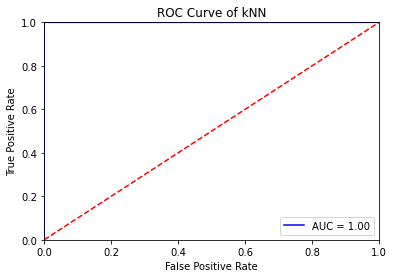

In [33]:
#from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_2,Y_train_2)

y_scores = knn.predict_proba(X_test_2)
fpr, tpr, threshold = roc_curve(Y_test_2, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()


Text(0.5, 1.0, 'ROC Curve of kNN')

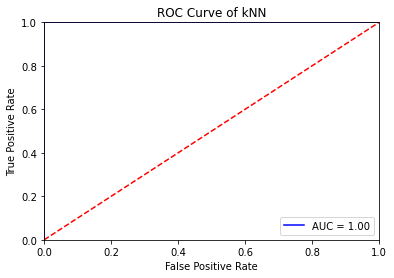

In [34]:

from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_2,Y_train_2)

y_scores = dt.predict_proba(X_test_2)
fpr, tpr, threshold = roc_curve(Y_test_2, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')



Text(0.5, 1.0, 'ROC Curve of kNN')

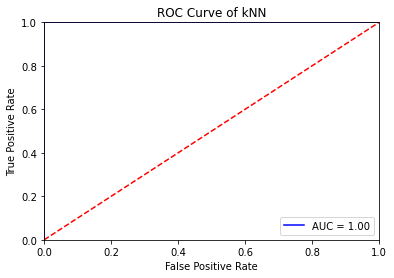

In [35]:
from sklearn.neural_network import MLPClassifier

#from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_2, Y_train_2)


y_scores = clf.predict_proba(X_test_2)
fpr, tpr, threshold = roc_curve(Y_test_2, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')

Dataset 3

In [66]:
selected_features_2 =["Live Birth Occurrence","Patient Age at Treatment", "Total Number of Previous treatments, Both IVF and DI at clinic", "Total Number of Previous IVF cycles","Total number of IVF pregnancies","Type of Infertility - Female Primary",
"Type of Infertility - Female Secondary", "Type of Infertility - Male Primary","Type of Infertility - Male Secondary","Type of Infertility -Couple Primary","Type of Infertility -Couple Secondary",
"Cause  of Infertility - Tubal disease", "Cause of Infertility - Ovulatory Disorder","Cause of Infertility - Male Factor","Cause of Infertility - Patient Unexplained","Cause of Infertility - Endometriosis",
"Cause of Infertility - Cervical factors","Cause of Infertility - Female Factors","Cause of Infertility - Partner Sperm Concentration","Cause of Infertility -  Partner Sperm Morphology","Causes of Infertility - Partner Sperm Motility","Cause of Infertility -  Partner Sperm Immunological factors",
"Stimulation used","Embryos Transfered","Type of treatment - IVF or DI","Specific treatment type","Total Embryos Created" ]

In [67]:
dataset_3 = df_combined[selected_features_2]
dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495628 entries, 0 to 158518
Data columns (total 27 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Live Birth Occurrence                                           119210 non-null  float64
 1   Patient Age at Treatment                                        495628 non-null  object 
 2   Total Number of Previous treatments, Both IVF and DI at clinic  495628 non-null  object 
 3   Total Number of Previous IVF cycles                             495628 non-null  object 
 4   Total number of IVF pregnancies                                 495628 non-null  object 
 5   Type of Infertility - Female Primary                            495628 non-null  int64  
 6   Type of Infertility - Female Secondary                          495628 non-null  int64  
 7   Type of Infertility - Male Primary    

In [68]:
dataset_3 = dataset_3[dataset_3['Stimulation used'] != 0]
dataset_3["Live Birth Occurrence"]=dataset_3["Live Birth Occurrence"].fillna(0)
dataset_3["Embryos Transfered"]=dataset_3["Embryos Transfered"].fillna(0)
dataset_3["Total Embryos Created"]=dataset_3["Total Embryos Created"].fillna(0)
#Convert patient age to categorical data
dataset_3 = dataset_3[dataset_3['Patient Age at Treatment'] != "999"]
dataset_3["Patient Age at Treatment"] = dataset_3["Patient Age at Treatment"].str.replace(" ","")
dataset_3 = dataset_3.replace("> 50","50")
dataset_3 = dataset_3.replace(">=5","5")
#dataset_1["Patient Age at Treatment"] = dataset_1.replace({"Patient Age at Treatment":{"18-34":"0", "35-37":"1" ,"38-39": "2","40-42": "3", "43-44": "4","44-50": "5"}})
dataset_3["Patient Age at Treatment"] = dataset_3.replace({"Patient Age at Treatment":{"18-34":"0", "35-37":"1" ,"38-39": "2","40-42": "3", "43-44": "4","44-50": "5"}})
dataset_3 = dataset_3.replace("Patient","1")
dataset_3 = dataset_3.replace("Partner","1")
dataset_3 = dataset_3.replace("Donor","0")
dataset_3 = dataset_3.replace("Partner & Donor","0")
dataset_3 = dataset_3.replace("IVF","1")
dataset_3 = dataset_3.replace("DI","0")

dataset_3["Specific treatment type"] = dataset_3.replace({"Specific treatment type":{"IVF":"1", "ICSI":"0" ,"IUI": "0","Unknown": "0", "ICSI / AH": "0","ICSI / BLASTOCYST ": "0"}})

 


In [69]:
dataset_3.head()

,Live Birth Occurrence,Patient Age at Treatment,"Total Number of Previous treatments, Both IVF and DI at clinic",Total Number of Previous IVF cycles,Total number of IVF pregnancies,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,...,Cause of Infertility - Female Factors,Cause of Infertility - Partner Sperm Concentration,Cause of Infertility - Partner Sperm Morphology,Causes of Infertility - Partner Sperm Motility,Cause of Infertility - Partner Sperm Immunological factors,Stimulation used,Embryos Transfered,Type of treatment - IVF or DI,Specific treatment type,Total Embryos Created
0,1.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.0,0,1.0,0
2,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.0,0,1.0,0
3,0.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.0,0,0.0,0
4,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.0,0,0.0,0
5,0.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.0,0,0.0,0


In [70]:
dataset_3_X = dataset_3.loc[:, dataset_3.columns != "Live Birth Occurrence"]
dataset_3_Y = dataset_3["Live Birth Occurrence"]
from sklearn.model_selection import train_test_split
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(dataset_3_X, dataset_3_Y, test_size=0.3, random_state=42)

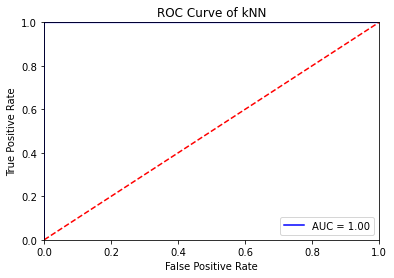

In [71]:
#from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_3,Y_train_3)

y_scores = knn.predict_proba(X_test_3)
fpr, tpr, threshold = roc_curve(Y_test_3, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()



Text(0.5, 1.0, 'ROC Curve of kNN')

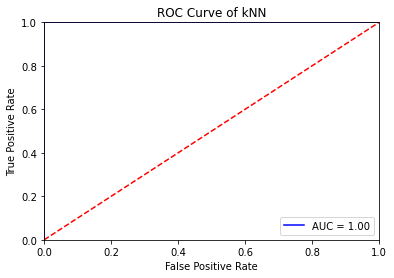

In [72]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_3,Y_train_3)

y_scores = dt.predict_proba(X_test_3)
fpr, tpr, threshold = roc_curve(Y_test_3, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')


Text(0.5, 1.0, 'ROC Curve of kNN')

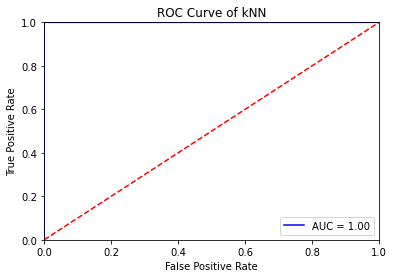

In [73]:

from sklearn.neural_network import MLPClassifier

#from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_3, Y_train_3)


y_scores = clf.predict_proba(X_test_3)
fpr, tpr, threshold = roc_curve(Y_test_3, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')